In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('IMDb.csv')

df.drop(['id','color'],axis='columns')

,director,criticReviews,duration,directorLikes,actor3likes,actor2,actor1likes,gross,actor1,title,...,country,contentRating,budget,year,actor2Likes,rating,aspectRatio,movieLikes,genre,subgenre
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar�,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action,Adventure
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End�,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action,Adventure
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre�,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action,Adventure
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises�,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action,Thriller
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens� ...,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,Documentary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Eric Mabius,Signed Sealed Delivered�,...,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84,Comedy,Drama
5039,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Natalie Zea,The Following�,...,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000,Crime,Drama
5040,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Eva Boehnke,A Plague So Pleasant�,...,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16,Drama,Horror
5041,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling�,...,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660,Comedy,Drama


In [3]:
my_cols=['castTotalLikes','directorLikes','actor1likes','movieLikes','fbPosters','year','duration','genre','contentRating','criticReviews','userReviews','userVotes','rating']
df=df[my_cols]
df.head()

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,Action,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,Action,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,Action,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,Action,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,Documentary,NaN,NaN,NaN,8,7.1


In [4]:
df.isnull().sum()

castTotalLikes      0
directorLikes     104
actor1likes         7
movieLikes          0
fbPosters          13
year              108
duration           15
genre               0
contentRating     303
criticReviews      50
userReviews        21
userVotes           0
rating              0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [6]:
df['genre']=le.fit_transform(df['genre'])
df

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,PG-13,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,PG-13,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,PG-13,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,PG-13,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,6,NaN,NaN,NaN,8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2283,2.0,637.0,84,2.0,2013.0,87.0,4,NaN,1.0,6.0,629,7.7
5039,1753,NaN,841.0,32000,1.0,NaN,43.0,5,TV-14,43.0,359.0,73839,7.5
5040,0,0.0,0.0,16,0.0,2013.0,76.0,7,NaN,13.0,3.0,38,6.3
5041,2386,0.0,946.0,660,5.0,2012.0,100.0,4,PG-13,14.0,9.0,1255,6.3


In [7]:
df['contentRating']=le.fit_transform(df['contentRating'])
df

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
0,4834,0.0,1000.0,33000,0.0,2009.0,178.0,0,7,723.0,3054.0,886204,7.9
1,48350,563.0,40000.0,0,0.0,2007.0,169.0,0,7,302.0,1238.0,471220,7.1
2,11700,0.0,11000.0,85000,1.0,2015.0,148.0,0,7,602.0,994.0,275868,6.8
3,106759,22000.0,27000.0,164000,0.0,2012.0,164.0,0,7,813.0,2701.0,1144337,8.5
4,143,131.0,131.0,0,0.0,NaN,NaN,6,18,NaN,NaN,8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,2283,2.0,637.0,84,2.0,2013.0,87.0,4,18,1.0,6.0,629,7.7
5039,1753,NaN,841.0,32000,1.0,NaN,43.0,5,10,43.0,359.0,73839,7.5
5040,0,0.0,0.0,16,0.0,2013.0,76.0,7,18,13.0,3.0,38,6.3
5041,2386,0.0,946.0,660,5.0,2012.0,100.0,4,7,14.0,9.0,1255,6.3


In [8]:
df=df.dropna()
df.describe().round(1)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
count,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0,4867.0
mean,9944.3,696.1,6732.1,7648.0,1.4,2002.4,108.3,4.1,8.1,143.0,279.0,85870.9,6.4
std,18420.6,2832.9,15232.4,19435.4,2.0,12.5,22.5,3.7,3.0,121.4,381.5,140010.7,1.1
min,0.0,0.0,0.0,0.0,0.0,1916.0,14.0,0.0,0.0,1.0,1.0,5.0,1.6
25%,1442.5,7.0,625.0,0.0,0.0,1999.0,94.0,1.0,7.0,53.0,69.0,9506.0,5.8
50%,3151.0,50.0,1000.0,170.0,1.0,2005.0,104.0,4.0,7.0,112.0,161.0,36108.0,6.5
75%,14165.0,199.5,11000.0,4000.0,2.0,2011.0,118.0,7.0,9.0,197.0,334.5,99034.0,7.2
max,656730.0,23000.0,640000.0,349000.0,43.0,2016.0,330.0,20.0,18.0,813.0,5060.0,1689764.0,9.3


In [9]:
df.corr().round(3)

,castTotalLikes,directorLikes,actor1likes,movieLikes,fbPosters,year,duration,genre,contentRating,criticReviews,userReviews,userVotes,rating
castTotalLikes,1.000,0.118,0.951,0.209,0.096,0.114,0.120,-0.090,-0.039,0.259,0.202,0.262,0.095
directorLikes,0.118,1.000,0.090,0.163,-0.041,-0.062,0.173,-0.008,-0.027,0.181,0.221,0.297,0.173
actor1likes,0.951,0.090,1.000,0.135,0.076,0.090,0.082,-0.064,-0.020,0.186,0.142,0.189,0.085
movieLikes,0.209,0.163,0.135,1.000,0.011,0.223,0.214,-0.075,-0.053,0.688,0.397,0.535,0.256
fbPosters,0.096,-0.041,0.076,0.011,1.000,0.060,0.029,-0.062,0.013,-0.030,-0.068,-0.026,-0.066
year,0.114,-0.062,0.090,0.223,0.060,1.000,-0.132,-0.039,0.189,0.280,0.000,0.012,-0.212
duration,0.120,0.173,0.082,0.214,0.029,-0.132,1.000,-0.075,-0.062,0.251,0.352,0.339,0.350
genre,-0.090,-0.008,-0.064,-0.075,-0.062,-0.039,-0.075,1.000,0.153,-0.087,-0.081,-0.133,-0.003
contentRating,-0.039,-0.027,-0.020,-0.053,0.013,0.189,-0.062,0.153,1.000,-0.124,-0.086,-0.094,-0.004
criticReviews,0.259,0.181,0.186,0.688,-0.030,0.280,0.251,-0.087,-0.124,1.000,0.605,0.622,0.333


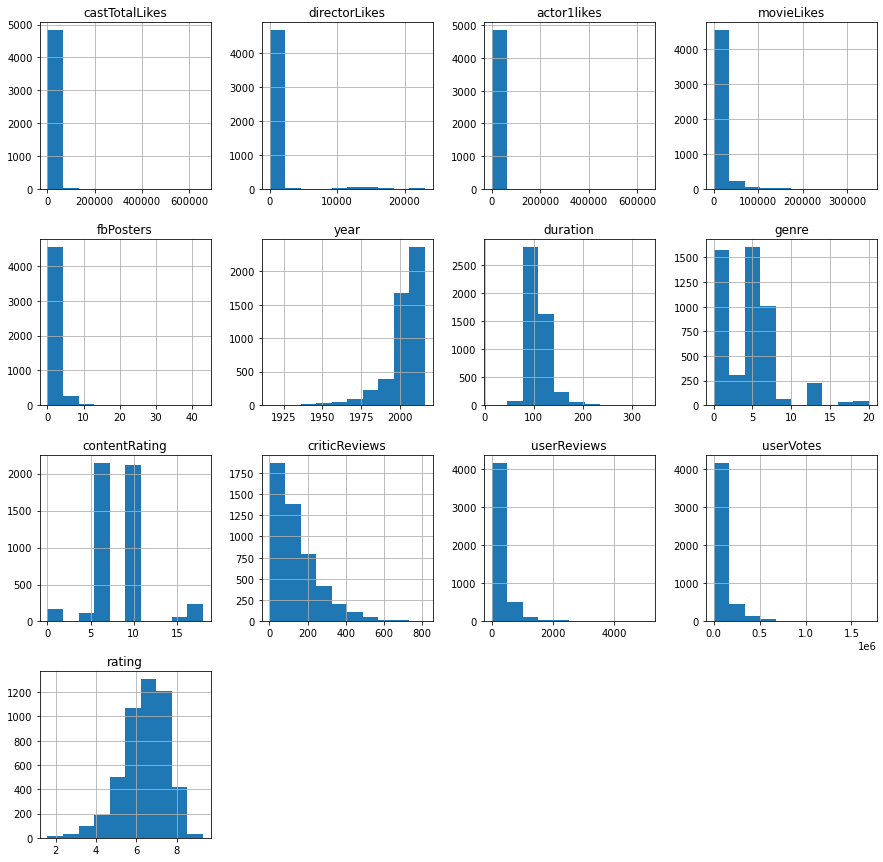

In [10]:
pd.DataFrame.hist(df,figsize=[15,15]);

In [27]:
h=df
bis=[0.0,3.0,5.0,7.5,10.0]
groups=['D','C','B','A']
h['categories']=pd.cut(h.rating,bis,labels=groups)
x=h.drop(['rating','categories'], axis=1)
y=h.categories

<ipython-input-27-e8272d33b84f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['categories']=pd.cut(h.rating,bis,labels=groups)


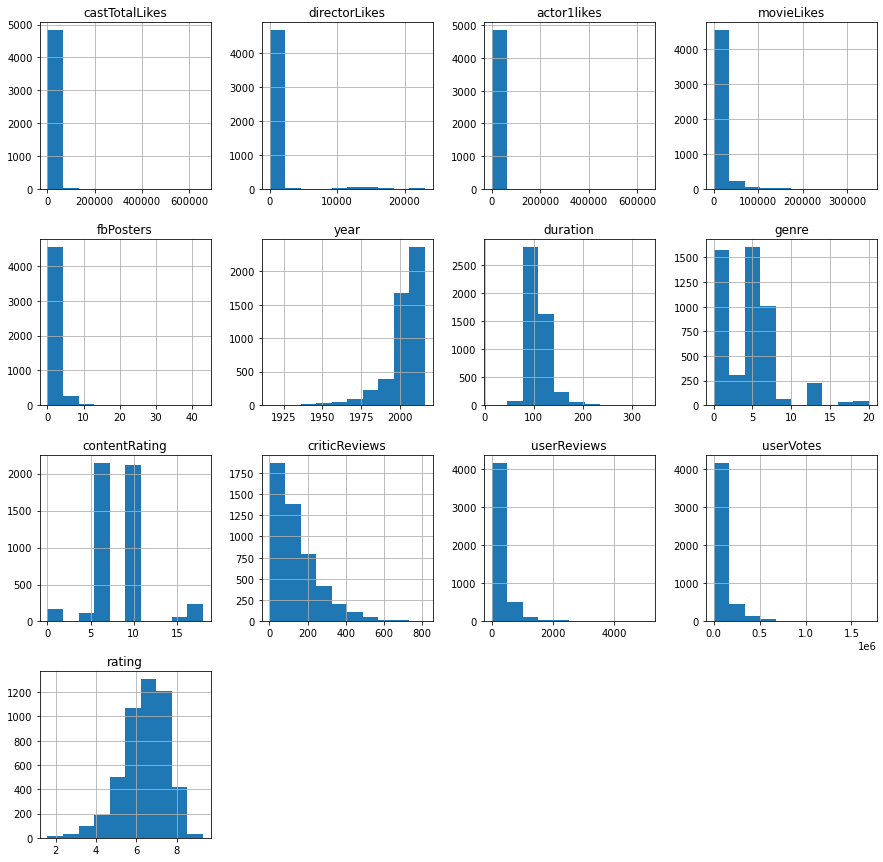

In [12]:
pd.DataFrame.hist(df,figsize=[15,15]);

In [14]:
import seaborn as sns
data = pd.read_csv(C:\Users\Monisha\My work\IMDb.csv, index_col=1)
data = data.drop(data.columns[[0, 1]], axis=1)
data.index.names = ['genre']
g = sns.heatmap(data)
g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_title('Heatmap')
plt.tight_layout()
plt.show()
extract_csv_gen_plot("output_01.csv")

SyntaxError: unexpected character after line continuation character (<ipython-input-14-e90723683daf>, line 2)

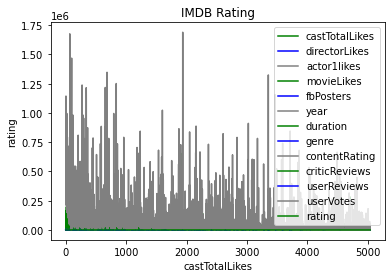

In [19]:
df.plot(color=['green','blue','gray'])
plt.title('IMDB Rating')
plt.xlabel('castTotalLikes')
plt.ylabel('rating')
plt.show()

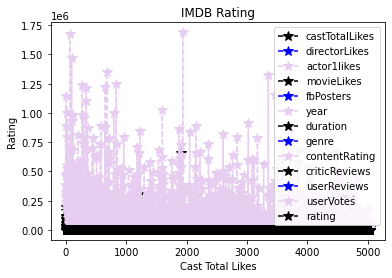

In [25]:
df.plot(kind='line',color=['black','blue','#E7CEF0'],marker="*",markersize=10,linestyle="--")
plt.title('IMDB Rating')
plt.xlabel('Cast Total Likes')
plt.ylabel('Rating')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

In [ ]:
from sklearn import metrics
k_range=range(25,40)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    z=metrics.accuracy_score(y_test,pred)
    k_scores.append(z)

plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [ ]:
k_scores=pd.DataFrame(k_scores)
print('Maximum Accuracy for KNN: %f'%k_scores.max())

## Support Vector Machine

In [ ]:
df.head(50)

In [ ]:
df[50:100]

In [ ]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [ ]:
plt.xlabel('rating')
plt.ylabel('year')
plt.scatter(df0['rating'], df0['year'], color="green", marker='+')
plt.scatter(df1['rating'], df1['year'], color="blue", marker='.')

In [ ]:
plt.xlabel('rating')
plt.ylabel('categories')
plt.scatter(df0['rating'], df0['categories'], color="red", marker='+')
plt.scatter(df1['rating'], df1['categories'], color="blue", marker='.')

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('categories', axis='columns')
y=df.categories

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model_R=SVC(C=10)
model_R.fit(X_train,y_train)
model_R.score(X_test,y_test)

In [ ]:
model_G=SVC(gamma=3)
model_G.fit(X_train,y_train)
model_G.score(X_test,y_test)